# Exploring convolution

First, include some libraries

In [1]:
# Run boilerplate code to set up environment

#%run prelude.py
%run prelude.py --no-show-animations

Prelude loaded OK
(Animation display disabled)


## Convolution Inputs


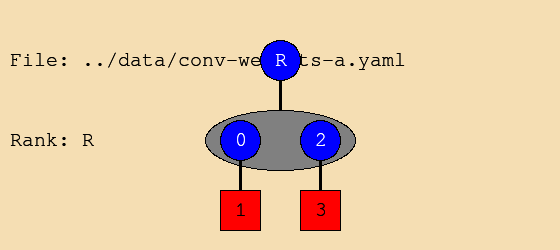

In [ ]:
w = Tensor(os.path.join(data_dir, "conv-weights-a.yaml"))
i = Tensor(os.path.join(data_dir, "conv-activations-a.yaml"))

displayTensor(w)
displayTensor(i)

## Weight Stationary

In [ ]:
o = Tensor(rank_ids=["P"])

canvas = TensorCanvas(w, i, o)

w_r = w.getRoot()
i_h = i.getRoot()
o_p = o.getRoot()

R = w_r.maxCoord() + 1
H = i_h.maxCoord() + 1
P = H - R + 1

print("Convolution")

for r, (w_val) in w_r:
    print(f"Processing weight: ({r}, ({w_val}))")
    for p, (o_p_ref, i_val) in o_p << i_h.project(lambda h: h-r, (0, P)):
        print(f"  Processing output ({p}, ({o_p_ref}, {i_val})")
        o_p_ref += w_val * i_val
        canvas.addFrame((r,), (p+r,), (p,))

displayCanvas(canvas)

## Input Stationary

In [ ]:
o = Tensor(rank_ids=["P"])

canvas = TensorCanvas(w, i, o)

w_r = w.getRoot()
i_h = i.getRoot()
o_p = o.getRoot()

R = w_r.maxCoord() + 1
H = i_h.maxCoord() + 1
P = H - R + 1

print("Convolution")

for h, (i_val) in i_h:
    print(f"Processing input: ({h}, ({i_val}))")
    for p, (o_p_ref, w_val) in o_p << w_r.project(lambda r: h-r, (0, P)):
        print(f"  Processing output ({p}, ({o_p_ref}, {w_val})")
        o_p_ref += w_val * i_val
        canvas.addFrame((h-p,), (h,), (p,))


displayCanvas(canvas)

## Output Stationary

In [ ]:
o = Tensor(rank_ids=["P"])


w_r = w.getRoot()
i_h = i.getRoot()
o_p = o.getRoot()

R = w_r.maxCoord() + 1
H = i_h.maxCoord() + 1
P = H - R + 1

print("Convolution")

output_shape = Fiber(coords=range(P), initial=1)

canvas = TensorCanvas(w, i, output_shape)

for p, (o_p_ref, _) in o_p << output_shape:
    print(f"Processing output: ({p}, ({o_p_ref}))")
    for h, (w_val, i_val) in w_r.project(lambda r: p+r) & i_h:
        print(f"  Processing weights and activations ({h}, ({w_val}, {i_val})")
        o_p_ref += w_val * i_val
        canvas.addFrame((h-p,), (h,), (p,))

displayCanvas(canvas)

## Output Stationary - Two pass

In [ ]:
o = Tensor(rank_ids=["P"])

canvas = TensorCanvas(w, i, o)

w_r = w.getRoot()
i_h = i.getRoot()
o_p = o.getRoot()

R = w_r.maxCoord() + 1
H = i_h.maxCoord() + 1
P = H - R + 1

print("Convolution")

pass1_count = 0


for r, (_) in w_r:
    print(f"Processing weight: ({r}, (_))")
    for p, (o_p_ref, _) in o_p << i_h.project(lambda h: h-r, (0, P)):
        print(f"  Calculating output ({p}, ({o_p_ref}, _)")
        pass1_count += 1
        canvas.addFrame((r,), (p+r,), (p,))

print("Pass1 count: %s" % pass1_count)
displayTensor(o_p)
canvas.addFrame([], [], [])

for p, (o_p_ref) in o_p:
    print(f"Processing output: ({p}, ({o_p_ref}))")
    for h, (w_val, i_val) in w_r.project(lambda r: p+r) & i_h:
        print(f"  Processing weights and activations ({h}, ({w_val}, {i_val})")
        o_p_ref += w_val * i_val
        canvas.addFrame((h-p,), (h,), (p,))


displayCanvas(canvas)

## Output Stationary - Two pass - Optimized

In [ ]:
o = Tensor(rank_ids=["P"])

canvas = TensorCanvas(w, i, o)

w_r = w.getRoot()
i_h = i.getRoot()
o_p = o.getRoot()

R = w_r.maxCoord() + 1
H = i_h.maxCoord() + 1
P = H - R + 1

print("Convolution")

pass1_count = 0

for r, (_) in w_r:
    print(f"Processing weight: ({r}, (_))")
    for p, (o_p_ref, _) in o_p << i_h.project(lambda h: h-r, (0, P)) - o_p:
        print(f"  Calculating output ({p}, ({o_p_ref}, _)")
        pass1_count += 1
        canvas.addFrame((r,), (p+r,), (p,))

print("Pass1 count: %s" % pass1_count)
canvas.addFrame([], [], [])

for p, (o_p_ref) in o_p:
    print(f"Processing output: ({p}, ({o_p_ref}))")
    for h, (w_val, i_val) in w_r.project(lambda r: p+r) & i_h:
        print(f"  Processing weights and activations ({h}, ({w_val}, {i_val})")
        o_p_ref += w_val * i_val
        canvas.addFrame((h-p,), (h,), (p,))


displayCanvas(canvas)


## Testing area

For running alternative algorithms